# Dampled Oscillation

## Objective
Demonstrates ``dmp_osc_conv_gau``routine

``dmp_osc_conv_gau``: Computes the convolution of damped oscillation and gaussian function

Dampled oscillation is modeled to $\exp(-kt)\cos(2\pi t/T+\phi)$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TRXASprefitpack import dmp_osc_conv_gau
plt.rcParams["figure.figsize"] = (14,10)

## Condition

1. ``fwhm``: 0.15 ps
    
2. ``tau``: 10 ps
    
3. ``period``: 0.15 ps 0.3 ps 3 ps

4. ``phase``: 0
    
5. ``eta``: 0.7

In [2]:
fwhm = 0.15
tau = 10
period = [0.15, 0.3, 3]
phase_factor = 0

# time range

t_1 = np.arange(-1, 1, 0.1)
t_2 = np.arange(1, 3, 0.2)
t_3 = np.arange(3, 10, 0.5)
t_4 = np.arange(10, 50, 4)
t_5 = np.arange(50, 100, 10)
t_6 = np.arange(100, 1000, 100)

t = np.hstack((t_1, t_2, t_3, t_4, t_5, t_6)) 

## ``dmp_osc_conv_gau`` routine

In [3]:
help(dmp_osc_conv_gau)

Help on function dmp_osc_conv_gau in module TRXASprefitpack.mathfun.exp_conv_irf:

dmp_osc_conv_gau(t: Union[float, numpy.ndarray], fwhm: float, k: float, T: float, phase: float) -> Union[float, numpy.ndarray]
    Compute damped oscillation convolved with normalized gaussian
    distribution
    
    Args:
      t: time
      fwhm: full width at half maximum of gaussian distribution
      k: damping constant (inverse of life time)
      T: period of vibration 
      phase: phase factor
    
    Returns:
     Convolution of normalized gaussian distribution and 
     damped oscillation :math:`(\exp(-kt)cos(2\pi t/T+phase))`.



In [4]:
gau_osc_1 = dmp_osc_conv_gau(t, fwhm, 1/tau, period[0], phase_factor)
gau_osc_2 = dmp_osc_conv_gau(t, fwhm, 1/tau, period[1], phase_factor)
gau_osc_3 = dmp_osc_conv_gau(t, fwhm, 1/tau, period[2], phase_factor)

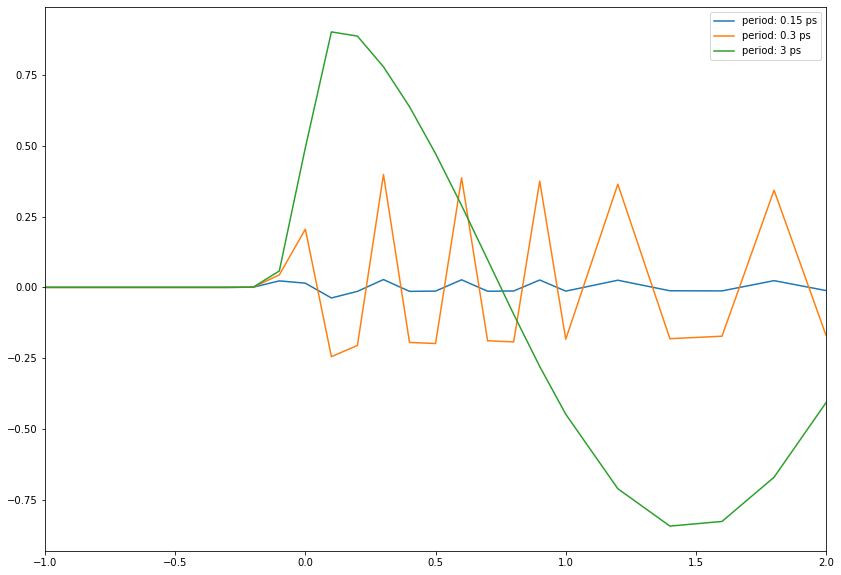

In [5]:
plt.plot(t, gau_osc_1, label=f'period: {period[0]} ps')
plt.plot(t, gau_osc_2, label=f'period: {period[1]} ps')
plt.plot(t, gau_osc_3, label=f'period: {period[2]} ps')
plt.legend()
plt.xlim(-1, 2)
plt.show()

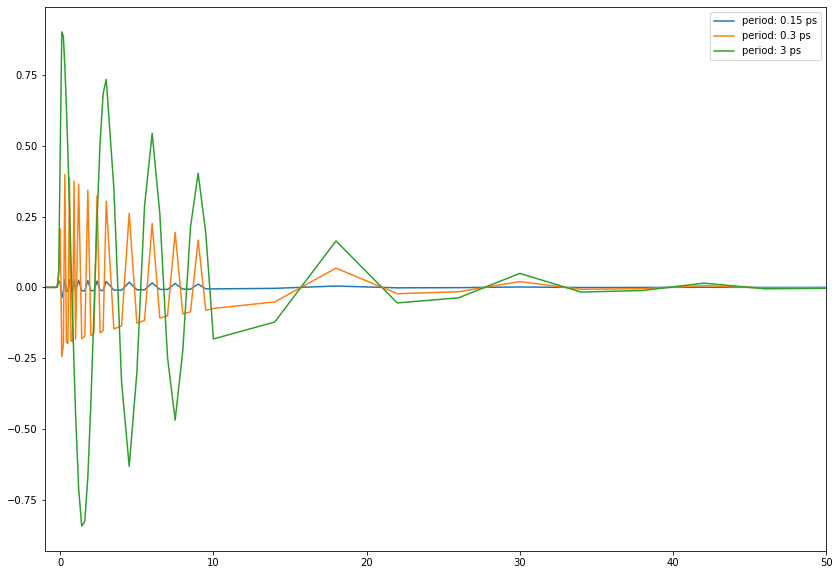

In [6]:
plt.plot(t, gau_osc_1, label=f'period: {period[0]} ps')
plt.plot(t, gau_osc_2, label=f'period: {period[1]} ps')
plt.plot(t, gau_osc_3, label=f'period: {period[2]} ps')
plt.legend()
plt.xlim(-1,50)
plt.show()

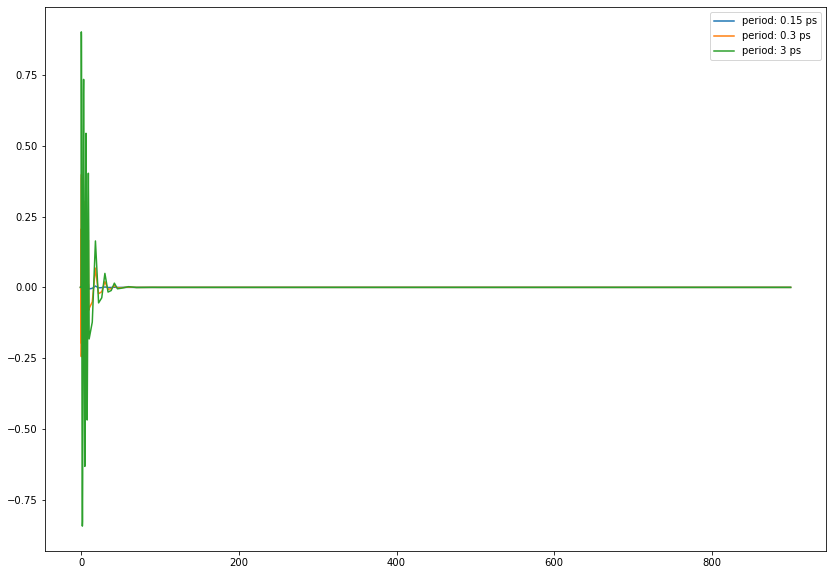

In [7]:
plt.plot(t, gau_osc_1, label=f'period: {period[0]} ps')
plt.plot(t, gau_osc_2, label=f'period: {period[1]} ps')
plt.plot(t, gau_osc_3, label=f'period: {period[2]} ps')
plt.legend()
plt.show()

When the value of ``period`` of oscillation is similar to or less than ``fwhm`` of gaussian probe pulse, It is hard to see oscillation feature.